In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import readdy

In [2]:
edge_length = 100. /2.
particle_radius = 1.0
diff = 0.7
rate_scaling = 350.0
n_prey = 1000 //4
n_predator = 1000//4
box_size = np.array([edge_length, edge_length, 2.])

data_dir = "/home/chris/workspace/data/workshop"
out_file = os.path.join(data_dir, "lv-"+str(rate_scaling)+".h5")
n_steps = int(100000/np.sqrt(rate_scaling)) + 10000
dt = 0.01

In [3]:
system = readdy.ReactionDiffusionSystem(
    box_size=box_size, 
    periodic_boundary_conditions=[False, False, False], 
    unit_system=None)

In [4]:
system.add_species("prey", diffusion_constant=diff/np.sqrt(rate_scaling))
system.add_species("predator", diffusion_constant=diff/np.sqrt(rate_scaling))

system.reactions.add_fission("birth", "prey", "prey", "prey", 
                             rate=np.sqrt(rate_scaling)*4e-2, 
                             product_distance=2.*particle_radius)

system.reactions.add_enzymatic("eat", "predator", "prey", "predator",
                               rate=np.sqrt(rate_scaling)*1e-2, 
                               educt_distance=2.*particle_radius)

system.reactions.add_decay("decay", "predator", 
                           rate=np.sqrt(rate_scaling)*3e-2)

origin = [-edge_length/2+2, -edge_length/2+2, -0.01]
extent = [edge_length-4, edge_length-4, 0.02]
system.potentials.add_box("prey", 50., origin=origin, extent=extent)
system.potentials.add_box("predator", 50., origin=origin, extent=extent)

system.potentials.add_harmonic_repulsion("prey", "prey", 50., 2.*particle_radius)
system.potentials.add_harmonic_repulsion("predator", "predator", 50., 2.*particle_radius)

In [5]:
sim = system.simulation(kernel="CPU", reaction_handler="UncontrolledApproximation")

In [6]:
sim.output_file = out_file
sim.record_trajectory(stride=100)
sim.observe.number_of_particles(
    100, types=["prey", "predator"],
    callback=lambda x: print(x[0], x[1]))

In [7]:
sim.add_particles("prey", positions=np.random.uniform(size=(n_prey, 3))*box_size - 0.5 * box_size)
sim.add_particles("predator", positions=np.random.uniform(size=(n_predator, 3))*box_size - 0.5 * box_size)

In [8]:
if os.path.exists(sim.output_file):
    os.remove(sim.output_file)

sim.run(n_steps, dt)

  1%|          | 10/1534 [00:00<00:16, 93.14it/s]

Configured kernel context with:
--------------------------------
 - kBT = 1
 - periodic b.c. = (false, false, false)
 - box size = (50, 50, 2)
 - particle types:
     *  particle type "predator" with D=0.0374166
     *  particle type "prey" with D=0.0374166
 - potentials of order 1:
     * for type "predator"
         * Box potential with origin=(-23, -23, -0.01), extent=(46, 46, 0.02), and force constant k=50
     * for type "prey"
         * Box potential with origin=(-23, -23, -0.01), extent=(46, 46, 0.02), and force constant k=50
 - potentials of order 2:
     * for types "predator" and "predator"
         * Harmonic repulsion with force constant k=50
     * for types "prey" and "prey"
         * Harmonic repulsion with force constant k=50
 - unimolecular reactions:
     * Decay predator -> ø with a rate of 0.561249
     * Fission prey -> prey + prey with a rate of 0.748331, a product distance of 2, and weights 0.5 and 0.5
 - bimolecular reactions:
     * Enzymatic prey + predator 

  2%|▏         | 30/1534 [00:00<00:23, 64.57it/s]

779 163
1491 211


  3%|▎         | 40/1534 [00:00<00:39, 37.93it/s]

2713 461


  3%|▎         | 51/1534 [00:01<01:32, 16.06it/s]

3736 1391


  4%|▍         | 60/1534 [00:02<03:05,  7.94it/s]

3138 3320


  5%|▍         | 71/1534 [00:04<02:57,  8.22it/s]

1217 4624


  5%|▌         | 82/1534 [00:05<02:25,  9.96it/s]

350 3644


  6%|▋         | 96/1534 [00:06<01:08, 20.97it/s]

135 2303


  7%|▋         | 108/1534 [00:06<00:47, 30.29it/s]

101 1426
82 860


  9%|▉         | 136/1534 [00:06<00:25, 54.10it/s]

95 566
114 371
170 246


 10%|█         | 159/1534 [00:06<00:18, 72.91it/s]

271 210
404 231


 12%|█▏        | 178/1534 [00:07<00:19, 69.06it/s]

539 319
651 452


 13%|█▎        | 193/1534 [00:07<00:24, 54.92it/s]

726 624


 13%|█▎        | 206/1534 [00:07<00:29, 45.04it/s]

774 756


 14%|█▍        | 217/1534 [00:08<00:33, 39.61it/s]

810 843


 15%|█▍        | 226/1534 [00:08<00:35, 36.73it/s]

687 1035


 15%|█▌        | 234/1534 [00:08<00:34, 37.16it/s]

534 1059


 16%|█▋        | 250/1534 [00:08<00:29, 43.83it/s]

478 902
510 766


 17%|█▋        | 267/1534 [00:09<00:26, 48.13it/s]

586 683
674 668


 19%|█▊        | 287/1534 [00:09<00:28, 43.52it/s]

745 670


 19%|█▉        | 297/1534 [00:09<00:30, 40.76it/s]

811 761


 20%|█▉        | 306/1534 [00:10<00:32, 37.34it/s]

858 876


 20%|██        | 314/1534 [00:10<00:35, 34.70it/s]

893 996


 21%|██▏       | 326/1534 [00:10<00:37, 31.88it/s]

1026 1025


 22%|██▏       | 334/1534 [00:11<00:41, 28.81it/s]

1114 1171


 22%|██▏       | 343/1534 [00:11<00:46, 25.42it/s]

1037 1382


 23%|██▎       | 355/1534 [00:11<00:44, 26.28it/s]

846 1472


 24%|██▍       | 365/1534 [00:12<00:42, 27.48it/s]

689 1418


 25%|██▍       | 376/1534 [00:12<00:39, 29.60it/s]

633 1288


 25%|██▌       | 385/1534 [00:12<00:33, 33.85it/s]

549 1190


 26%|██▌       | 395/1534 [00:13<00:29, 39.21it/s]

497 1005


 26%|██▋       | 406/1534 [00:13<00:25, 43.81it/s]

494 855
585 704


 28%|██▊       | 427/1534 [00:13<00:23, 47.10it/s]

706 665


 28%|██▊       | 437/1534 [00:14<00:27, 40.37it/s]

963 656


 29%|██▉       | 442/1534 [00:14<00:30, 36.26it/s]

1194 871


 30%|██▉       | 454/1534 [00:14<00:38, 27.73it/s]

1178 1182


 30%|███       | 463/1534 [00:15<00:40, 26.21it/s]

949 1436


 31%|███       | 476/1534 [00:15<00:37, 28.02it/s]

826 1431


 32%|███▏      | 486/1534 [00:15<00:35, 29.25it/s]

803 1323


 32%|███▏      | 494/1534 [00:16<00:33, 30.75it/s]

680 1256


 33%|███▎      | 506/1534 [00:16<00:30, 33.33it/s]

625 1117


 34%|███▎      | 514/1534 [00:16<00:28, 35.73it/s]

668 988


 34%|███▍      | 528/1534 [00:17<00:26, 37.98it/s]

580 967


 35%|███▌      | 538/1534 [00:17<00:24, 40.35it/s]

548 934


 36%|███▌      | 548/1534 [00:17<00:23, 42.69it/s]

618 826


 36%|███▋      | 558/1534 [00:17<00:23, 41.27it/s]

745 769


 37%|███▋      | 563/1534 [00:17<00:24, 39.76it/s]

934 758


 37%|███▋      | 572/1534 [00:18<00:29, 32.55it/s]

1008 947


 38%|███▊      | 583/1534 [00:18<00:34, 27.26it/s]

1006 1133


 39%|███▉      | 595/1534 [00:19<00:33, 28.34it/s]

979 1226


 39%|███▉      | 605/1534 [00:19<00:31, 29.54it/s]

777 1328


 40%|████      | 617/1534 [00:19<00:27, 33.55it/s]

674 1180


 41%|████      | 625/1534 [00:19<00:25, 35.66it/s]

661 1054


 42%|████▏     | 638/1534 [00:20<00:23, 38.22it/s]

713 945


 42%|████▏     | 646/1534 [00:20<00:23, 38.35it/s]

704 953


 43%|████▎     | 654/1534 [00:20<00:24, 36.57it/s]

680 977


 44%|████▎     | 668/1534 [00:21<00:22, 39.33it/s]

628 985


 44%|████▍     | 678/1534 [00:21<00:20, 41.59it/s]

641 922


 45%|████▍     | 688/1534 [00:21<00:20, 41.80it/s]

711 864


 45%|████▌     | 697/1534 [00:21<00:21, 38.09it/s]

877 806


 46%|████▌     | 705/1534 [00:22<00:24, 34.27it/s]

907 980


 46%|████▋     | 713/1534 [00:22<00:25, 32.07it/s]

954 1069


 47%|████▋     | 725/1534 [00:22<00:27, 29.93it/s]

1008 1182


 48%|████▊     | 735/1534 [00:23<00:28, 27.90it/s]

947 1315


 49%|████▊     | 744/1534 [00:23<00:31, 25.10it/s]

852 1298


 49%|████▉     | 753/1534 [00:23<00:30, 25.69it/s]

829 1265


 50%|████▉     | 764/1534 [00:24<00:26, 28.83it/s]

813 1175


 51%|█████     | 775/1534 [00:24<00:25, 30.32it/s]

946 1054


 51%|█████     | 785/1534 [00:24<00:26, 28.56it/s]

982 1105


 52%|█████▏    | 795/1534 [00:25<00:26, 28.08it/s]

724 1316


 53%|█████▎    | 808/1534 [00:25<00:21, 34.02it/s]

541 1223


 53%|█████▎    | 818/1534 [00:25<00:18, 38.99it/s]

504 985


 54%|█████▍    | 828/1534 [00:26<00:16, 41.81it/s]

581 830


 55%|█████▍    | 839/1534 [00:26<00:15, 45.27it/s]

467 863
378 787


 56%|█████▌    | 859/1534 [00:26<00:12, 54.96it/s]

417 637
525 526


 57%|█████▋    | 877/1534 [00:27<00:12, 51.16it/s]

801 452


 58%|█████▊    | 883/1534 [00:27<00:14, 45.05it/s]

1083 576


 58%|█████▊    | 893/1534 [00:27<00:17, 35.95it/s]

1183 861


 59%|█████▉    | 905/1534 [00:27<00:21, 28.93it/s]

1228 1124


 59%|█████▉    | 912/1534 [00:28<00:24, 25.86it/s]

1249 1369


 60%|██████    | 924/1534 [00:28<00:25, 24.18it/s]

1165 1468


 61%|██████    | 933/1534 [00:29<00:25, 23.98it/s]

1050 1632


 62%|██████▏   | 945/1534 [00:29<00:23, 25.04it/s]

861 1658


 62%|██████▏   | 956/1534 [00:29<00:19, 28.94it/s]

583 1556


 63%|██████▎   | 965/1534 [00:30<00:16, 34.22it/s]

358 1320


 64%|██████▍   | 978/1534 [00:30<00:12, 43.36it/s]

308 959
306 742


 65%|██████▌   | 1001/1534 [00:30<00:09, 58.86it/s]

329 585
347 496


 67%|██████▋   | 1023/1534 [00:31<00:08, 63.22it/s]

474 422
659 407


 68%|██████▊   | 1037/1534 [00:31<00:09, 51.56it/s]

984 461


 68%|██████▊   | 1043/1534 [00:31<00:11, 42.22it/s]

1397 657


 69%|██████▊   | 1053/1534 [00:32<00:15, 30.55it/s]

1755 946


 69%|██████▉   | 1061/1534 [00:32<00:21, 22.40it/s]

1714 1606


 70%|██████▉   | 1072/1534 [00:33<00:25, 17.78it/s]

1144 2152


 71%|███████   | 1085/1534 [00:33<00:21, 21.28it/s]

715 2082


 71%|███████▏  | 1096/1534 [00:34<00:15, 27.44it/s]

491 1720


 72%|███████▏  | 1105/1534 [00:34<00:12, 33.85it/s]

403 1271


 73%|███████▎  | 1116/1534 [00:34<00:10, 40.50it/s]

407 944
440 770


 74%|███████▍  | 1142/1534 [00:34<00:07, 54.82it/s]

403 687
459 584


 76%|███████▌  | 1160/1534 [00:35<00:07, 52.89it/s]

601 564
799 563


 76%|███████▋  | 1172/1534 [00:35<00:07, 46.39it/s]

986 681


 77%|███████▋  | 1182/1534 [00:35<00:09, 35.81it/s]

1193 867


 78%|███████▊  | 1194/1534 [00:36<00:12, 27.23it/s]

1151 1229


 78%|███████▊  | 1203/1534 [00:36<00:14, 23.07it/s]

989 1410


 79%|███████▉  | 1215/1534 [00:37<00:12, 24.86it/s]

990 1342


 80%|███████▉  | 1224/1534 [00:37<00:12, 24.82it/s]

998 1344


 80%|████████  | 1233/1534 [00:38<00:13, 22.04it/s]

725 1493


 81%|████████  | 1244/1534 [00:38<00:10, 27.57it/s]

570 1333


 82%|████████▏ | 1256/1534 [00:38<00:08, 33.06it/s]

564 1073


 83%|████████▎ | 1266/1534 [00:39<00:06, 38.34it/s]

584 907


 83%|████████▎ | 1276/1534 [00:39<00:07, 36.25it/s]

619 876


 84%|████████▎ | 1284/1534 [00:39<00:07, 32.43it/s]

649 842


 84%|████████▍ | 1296/1534 [00:39<00:07, 32.79it/s]

671 825


 85%|████████▌ | 1304/1534 [00:40<00:07, 31.88it/s]

738 826


 86%|████████▌ | 1312/1534 [00:40<00:07, 30.63it/s]

821 852


 86%|████████▌ | 1322/1534 [00:40<00:08, 26.28it/s]

899 940


 87%|████████▋ | 1334/1534 [00:41<00:08, 23.80it/s]

1001 1000


 88%|████████▊ | 1343/1534 [00:41<00:09, 20.28it/s]

1073 1145


 88%|████████▊ | 1352/1534 [00:42<00:09, 18.79it/s]

916 1328


 89%|████████▉ | 1363/1534 [00:42<00:08, 20.28it/s]

691 1410


 90%|████████▉ | 1375/1534 [00:43<00:06, 25.20it/s]

621 1251


 90%|█████████ | 1382/1534 [00:43<00:05, 26.60it/s]

662 1113


 91%|█████████ | 1394/1534 [00:44<00:04, 30.05it/s]

703 976


 92%|█████████▏| 1406/1534 [00:44<00:04, 30.76it/s]

764 928


 92%|█████████▏| 1413/1534 [00:44<00:04, 28.42it/s]

874 931


 93%|█████████▎| 1422/1534 [00:45<00:04, 26.22it/s]

898 1038


 93%|█████████▎| 1434/1534 [00:45<00:03, 25.03it/s]

799 1176


 94%|█████████▍| 1443/1534 [00:45<00:03, 25.67it/s]

661 1212


 95%|█████████▍| 1455/1534 [00:46<00:02, 28.17it/s]

622 1120


 95%|█████████▌| 1463/1534 [00:46<00:02, 29.41it/s]

558 1030


 96%|█████████▋| 1477/1534 [00:46<00:01, 36.50it/s]

519 910
609 733


 98%|█████████▊| 1498/1534 [00:47<00:00, 42.02it/s]

871 659


 98%|█████████▊| 1503/1534 [00:47<00:00, 37.48it/s]

1259 728


 99%|█████████▊| 1511/1534 [00:47<00:00, 27.82it/s]

1505 1057


 99%|█████████▉| 1521/1534 [00:48<00:00, 20.48it/s]

1351 1593


100%|█████████▉| 1533/1534 [00:48<00:00, 20.05it/s]

1144 1771


100%|██████████| 1534/1534 [00:49<00:00, 31.27it/s]


In [9]:
traj = readdy.Trajectory(out_file)
traj.convert_to_xyz(particle_radii={"prey": particle_radius, "predator": particle_radius})
times, counts = traj.read_observable_number_of_particles()
counts = np.array(counts)

/home/chris/miniconda3/envs/tutorials/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


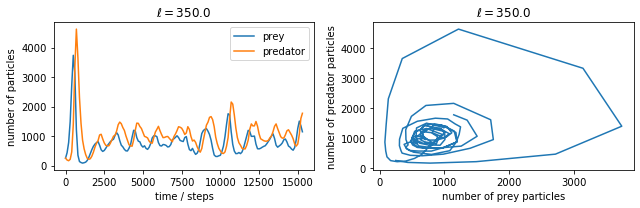

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9,3))
plt.sca(ax1)
plt.plot(times, counts[:,0], label="prey")
plt.plot(times, counts[:,1], label="predator")
plt.xlabel("time / steps")
plt.ylabel("number of particles")
plt.title(r"$\ell="+str(rate_scaling)+r"$")
plt.legend()
plt.sca(ax2)
plt.plot(counts[:,0], counts[:,1])
plt.ylabel("number of predator particles")
plt.xlabel("number of prey particles")
plt.title(r"$\ell="+str(rate_scaling)+r"$")
fig.tight_layout()
plt.savefig("lv-result-scaling-"+str(rate_scaling)+".pdf", transparent=True)

In [32]:
!vmd -e /home/chris/workspace/data/workshop/lv-350.0.h5.xyz.tcl > /dev/null

/home/chris/misc/vmd/lib/vmd/vmd_LINUXAMD64: /usr/lib/x86_64-linux-gnu/libGL.so.1: no version information available (required by /home/chris/misc/vmd/lib/vmd/vmd_LINUXAMD64)
